# Prática 02: Regressão de Cume

## 1. Importando as bibliotecas necessárias

In [1]:
import graphlab
import random
import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to lucascoelhosi96@gmail.com and will expire on March 22, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1524783118.log


## 2. Gerando artificialmente os dados

In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [3]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [5]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

### Adicionando aos dados um ruído gaussiano

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

## 3. Dispor os dados gerados em formato de SFrame

In [7]:
data = graphlab.SFrame({'X1':x,'Y':y})

In [8]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


## Definindo valores para a variável K

In [9]:
dadosk5 = graphlab.SFrame.copy(data[:5]) #dados da variável data para K = 5
dadosk10 = graphlab.SFrame.copy(data[:10]) #dados da variável data para K = 10

## 4. Definir uma função para criar as características do modelo de regressão polinomial de qualquer grau

In [10]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

## 5. Definir uma função para ajustar um modelo de regressão linear polinomial do grau "deg" aos dados "data"

In [11]:
def regressao_polinomial_cume(data, deg, l2_penalty):

    model = graphlab.linear_regression.create(polynomial_features(data,deg), 

                                              target='Y', l2_penalty=l2_penalty,

                                              validation_set=None,verbose=False)

    return model

 ## 6. Definir a função que imprime os coeficientes do modelo

In [12]:
def print_coefficients(model):    
  
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])

    print 'Coeficientes do polinômio de grau ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

## 7. Defina a função para plotar dados e previsões 

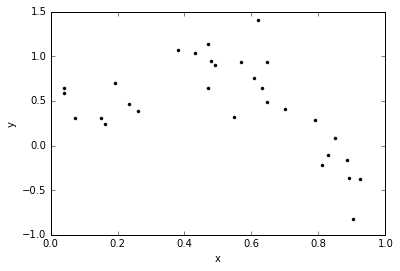

In [13]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [14]:
def plot_predicoes(data, model):
    plot_data(data)

    deg = len(model.coefficients['value'])-1
    
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

## 8. Encontre um modelo de regressão de cume utilizando um polinômio de grau 16 usando com um parâmetro de ajuste muito pequeno

In [21]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Coeficientes do polinômio de grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


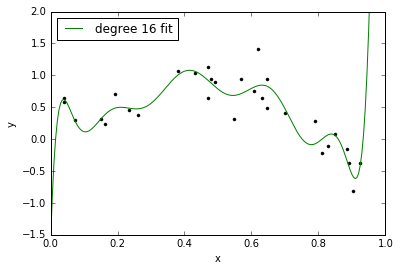

In [22]:
plot_predicoes(data,model)

## 9. Encontre um modelo de regressão de cume utilizando um polinômio de grau 16 usando com um parâmetro de ajuste muito grande

In [23]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=100)
print_coefficients(model)

Coeficientes do polinômio de grau 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


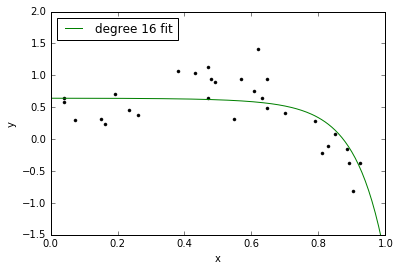

In [24]:
plot_predicoes(data,model)

## 10. Observar os modelos para uma sequência crescente de valores de lambda 

In [16]:
def loo(data, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

lambda = 1.00e-25
Coeficientes do polinômio de grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Coeficientes do polinômio de grau 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
Coefi

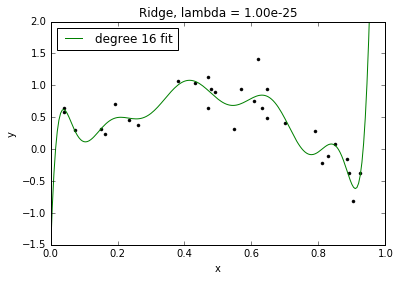

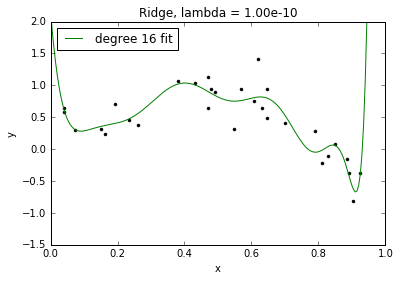

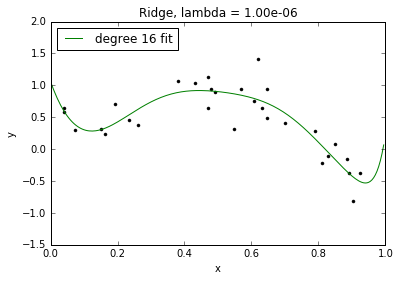

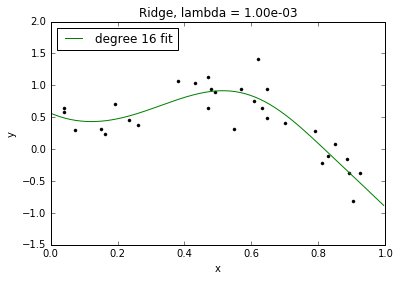

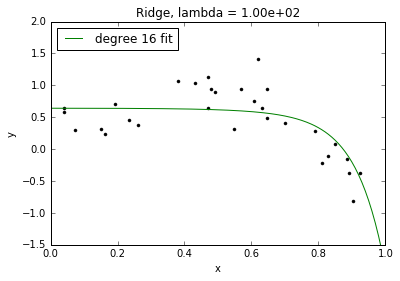

In [34]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = regressao_polinomial_cume(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

## 11. Definir a validação cruzada "leave one out"

In [17]:
def loo(data, deg, l2_penalty_values):
    
    data = polynomial_features(data, deg)
    
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

## 12. Gere diferentes valores de lambda

In [18]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

## 13. Capture o valor de lambda mais adequado para um polinômio de grau 16

In [19]:
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [20]:
best_l2_penalty

0.12915496650148839

### Capturando valor Lambda mais adequado para polinîmio de grau 16, com valor k = 5 e valor k = 10

In [21]:
l2_penalty_mse_k5,best_l2_penalty_k5 = loo(dadosk5, 16, l2_penalty_values)

l2_penalty_mse_k10,best_l2_penalty_k10 = loo(dadosk10, 16, l2_penalty_values)

## 14. Imprima os coeficientes e plot a predição do modelo de regressão de cume de grau 16 com o parâmetro lambda definido

lambda = 1.29e-01
Coeficientes do polinômio de grau 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918




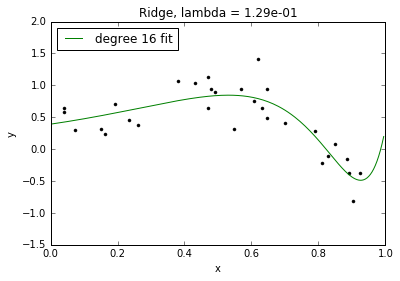

In [35]:
 model = regressao_polinomial_cume(data, deg=16, l2_penalty=best_l2_penalty)
 print 'lambda = %.2e' % best_l2_penalty
 print_coefficients(model)
 print '\n'
 plt.figure()
 plot_predicoes(data,model)
 plt.title('Ridge, lambda = %.2e' % best_l2_penalty)

### Imprimindo os coeficientes e plot para a predição do modelo de regressão de cume de grau 16 com o parâmetro lambda definido para k = 5 e k = 10


Regressão polinomial do cume:

lambda = 1.69e-01
Coeficientes do polinômio de grau 16:
           16             15            14          13           12
-0.000112 x  - 0.0006251 x  - 0.003414 x  - 0.0181 x  - 0.09193 x 
           11         10        9         8         7        6
 - 0.4356 x  - 1.817 x  - 5.54 x + 1.737 x + 223.4 x + 2374 x
          5         4         3         2
 + 418.1 x + 35.61 x - 9.939 x - 6.387 x - 1.679 x + 0.6251


lambda = 5.67e-02
Coeficientes do polinômio de grau 16:
            16            15           14          13          12
-0.0006355 x  - 0.003629 x  - 0.02043 x  - 0.1129 x  - 0.6089 x 
         11         10         9         8         7        6        5
 - 3.17 x  - 15.65 x  - 70.81 x - 269.4 x - 609.5 x + 2318 x + 1064 x
          4         3         2
 + 188.4 x + 6.159 x - 8.998 x - 3.133 x + 0.7037


lambda = 2.68e-02
Coeficientes do polinômio de grau 16:
           16            15           14          13         12
-0.001606 x  - 0

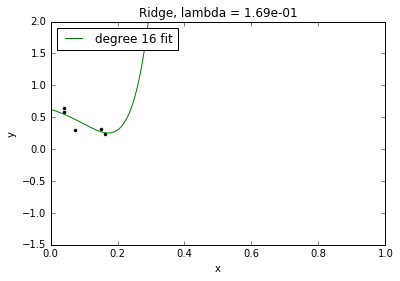

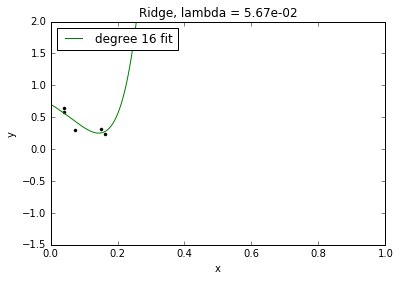

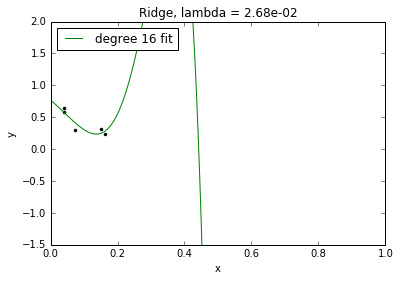

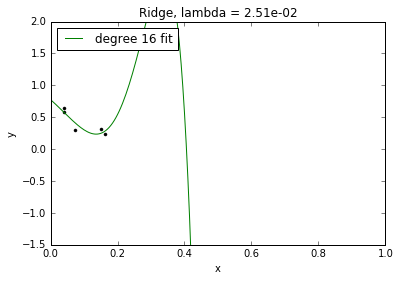

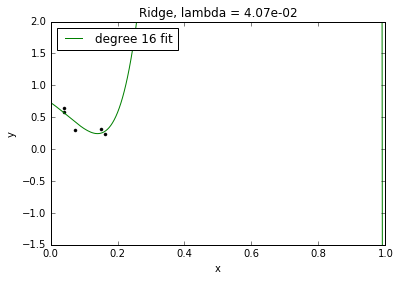

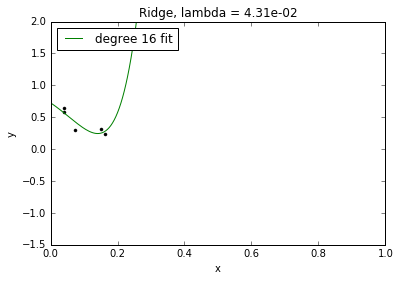

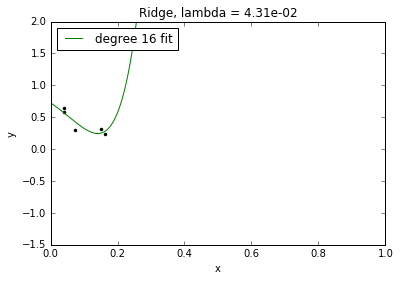

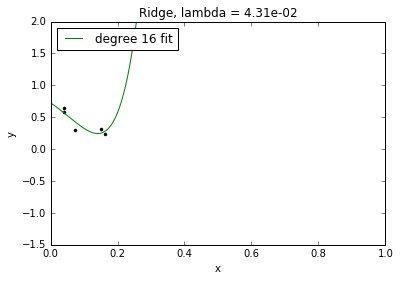

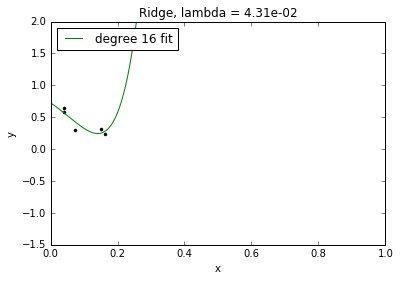

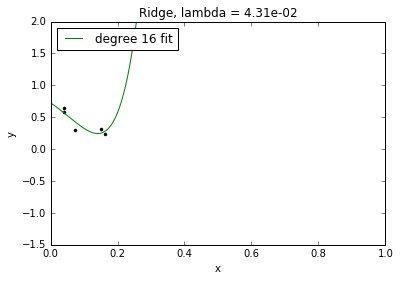

In [24]:
print'\nRegressão polinomial do cume:\n'

for l2_penalty in l2_penalty_mse_k5:
    
    modelk5 = regressao_polinomial_cume(dadosk5, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(modelk5)
    print '\n'
    plt.figure()
    plot_predicoes(dadosk5,modelk5)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)


Regressão polinomial do cume:

lambda = 4.44e+01
Coeficientes do polinômio de grau 16:
       16         15         14       13         12         11
45.35 x  + 109.9 x  + 267.1 x  + 652 x  + 762.6 x  + 346.5 x 
          10         9         8         7         6        5         4
 + 157.4 x  + 71.43 x + 32.31 x + 14.53 x + 6.477 x + 2.84 x + 1.208 x
           3          2
 + 0.4817 x + 0.1622 x + 0.03218 x + 0.4972


lambda = 4.99e+00
Coeficientes do polinômio de grau 16:
        16         15         14         13         12         11
-76.95 x  - 145.7 x  - 252.6 x  - 363.2 x  - 125.2 x  + 79.22 x 
          10         9         8         7         6         5
 + 97.08 x  + 71.06 x + 43.85 x + 24.66 x + 12.98 x + 6.437 x
          4         3          2
 + 2.967 x + 1.208 x + 0.3594 x + 0.02352 x + 0.4541


lambda = 1.89e-01
Coeficientes do polinômio de grau 16:
       16        15        14        13        12        11         10
-1067 x  - 2227 x  - 4525 x  - 8835 x  - 7741 x

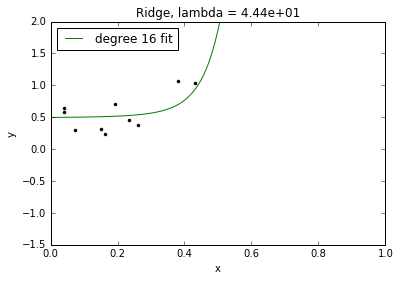

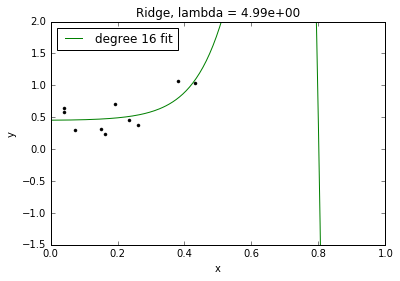

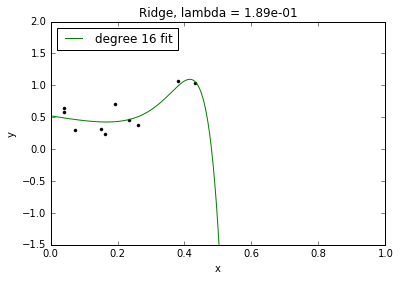

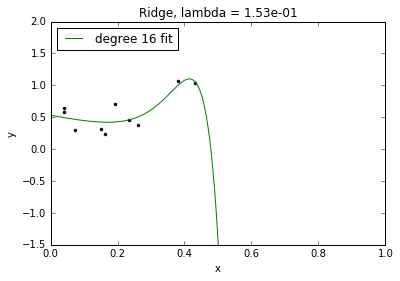

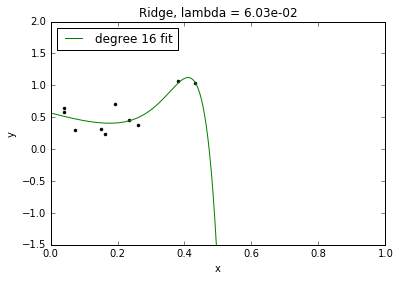

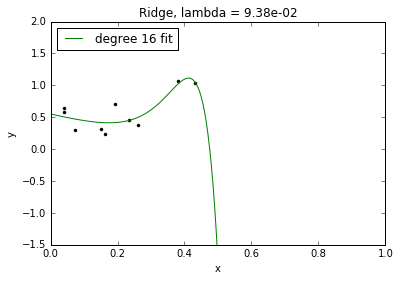

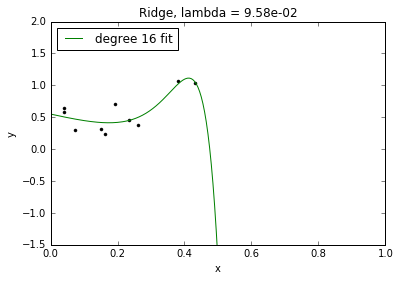

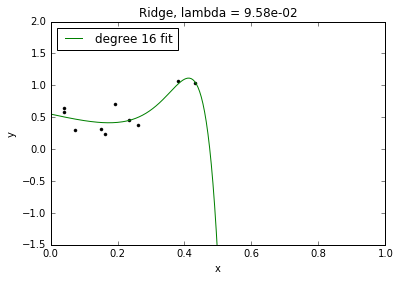

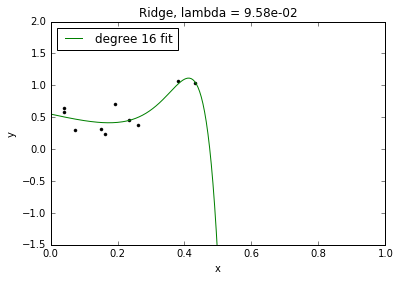

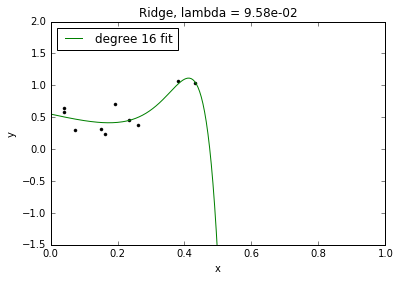

In [26]:
print'\nRegressão polinomial do cume:\n'

for l2_penalty in l2_penalty_mse_k10:    
    modelk10 = regressao_polinomial_cume(dadosk10, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(modelk10)
    print '\n'
    plt.figure()
    plot_predicoes(dadosk10,modelk10)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)